In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Get to know the data

In [3]:
housing= pd.read_csv('BostonHousing.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [5]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### CRIM – per capita crime rate by town 
### ZN – proportion of residential land zoned for lots over 25,000 sq.ft 
### INDUS – proportion of non-retail business acres per town 
### CHAS – Charles River dummy variable (1 if tract bounds river; else 0)
### NOX – nitric oxides concentration (parts per 10 million) 
### RM – average number of rooms per dwelling
### AGE – proportion of owner-occupied units built prior to 1940
### DIS – weighted distances to five Boston employment centres 
### RAD – index of accessibility to radial highways 
### TAX – full-value property-tax rate per 10,000 dollar
### PTRATIO – pupil-teacher ratio by town 
### B – 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
### LSTAT – % lower status of the population 
### MEDV – Median value of owner-occupied homes in (dollar) 1000’s



# 2. Data preparing

## 2.1 Check if there is missing value

In [6]:
missing_info= round(housing.isna().sum() * 100/housing.shape[0], 2)
missing_info

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

## 2.2 Check the distribution of the house price

<Axes: xlabel='medv', ylabel='Density'>

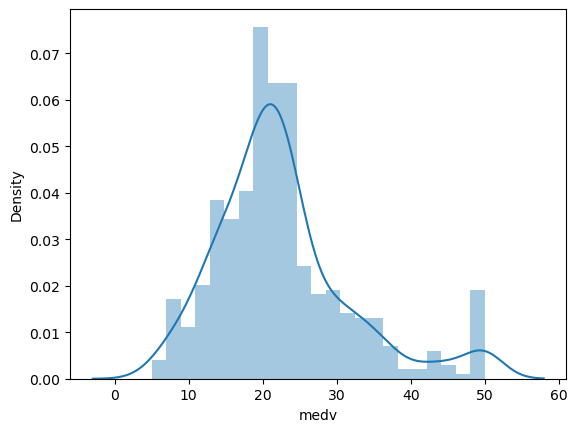

In [7]:
sns.distplot(housing['medv'])

In [8]:
import scipy.stats as stats

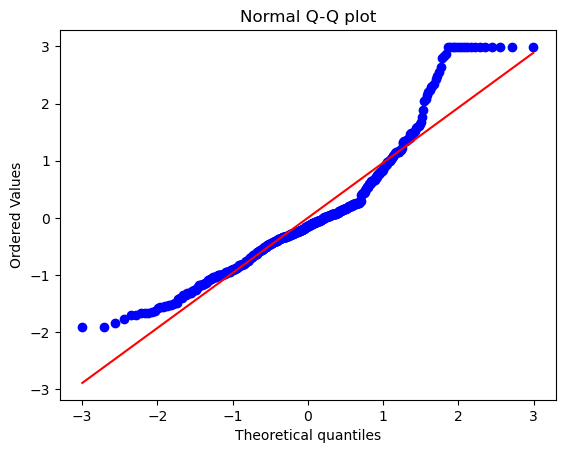

In [9]:
z = (housing['medv']-np.mean(housing['medv']))/np.std(housing['medv'])
stats.probplot(z, dist="norm", plot=plt)

plt.title("Normal Q-Q plot")
plt.show()

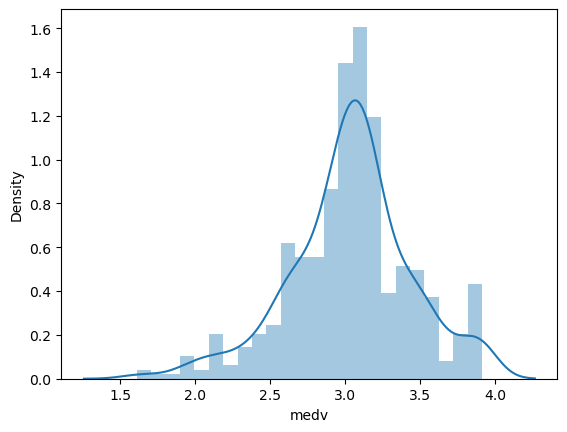

In [10]:
sns.distplot(np.log(housing['medv']))
plt.show()

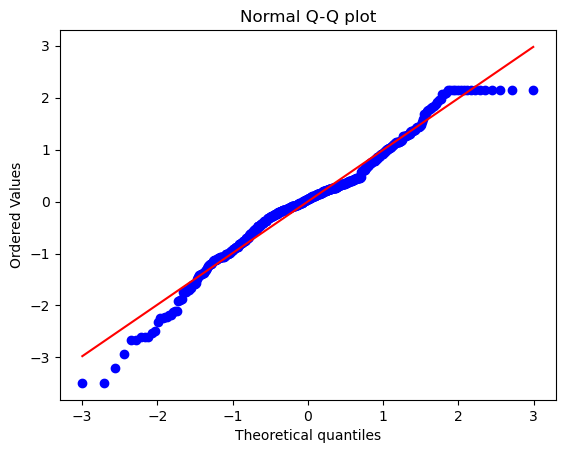

In [11]:
z = ((np.log(housing['medv']))-np.mean(np.log(housing['medv'])))/np.std((np.log(housing['medv'])))
stats.probplot(z, dist="norm", plot=plt)

plt.title("Normal Q-Q plot")
plt.show()

In [12]:
housing['medv_log_trans']= np.log(housing['medv'])
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_log_trans
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


## 2.3 Check the outliers

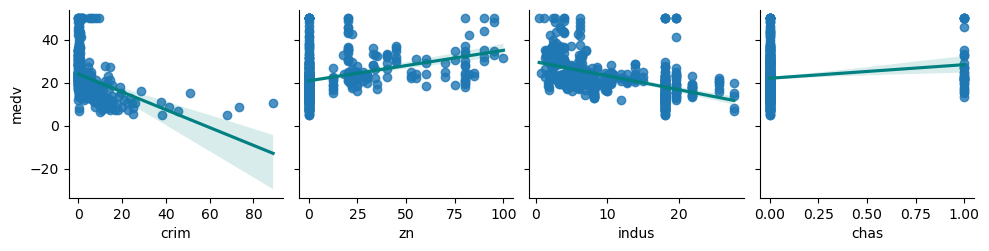

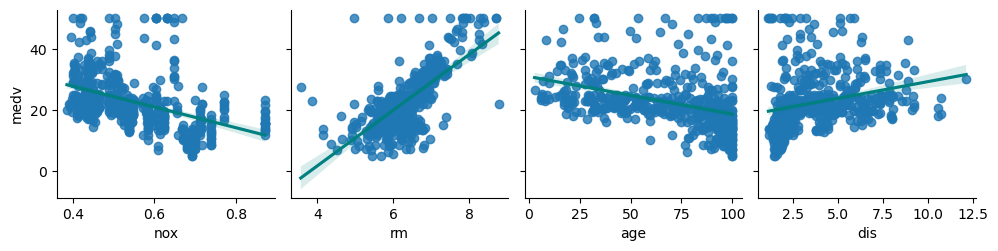

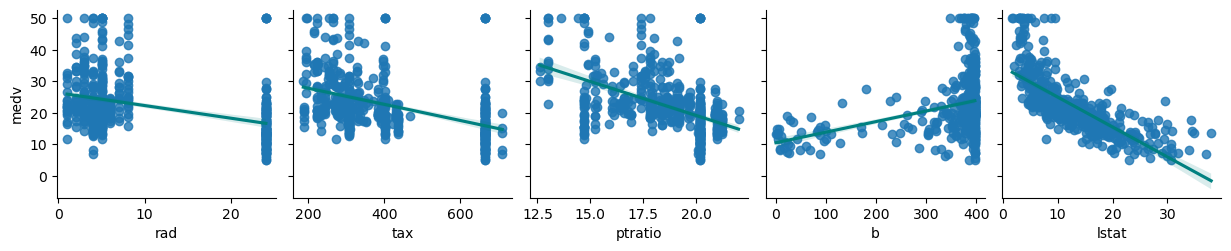

In [13]:
cols= ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']

sns.pairplot(housing, x_vars=['crim','zn','indus','chas'], y_vars='medv', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['nox','rm','age','dis'], y_vars='medv', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['rad','tax','ptratio','b','lstat'], y_vars='medv', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})


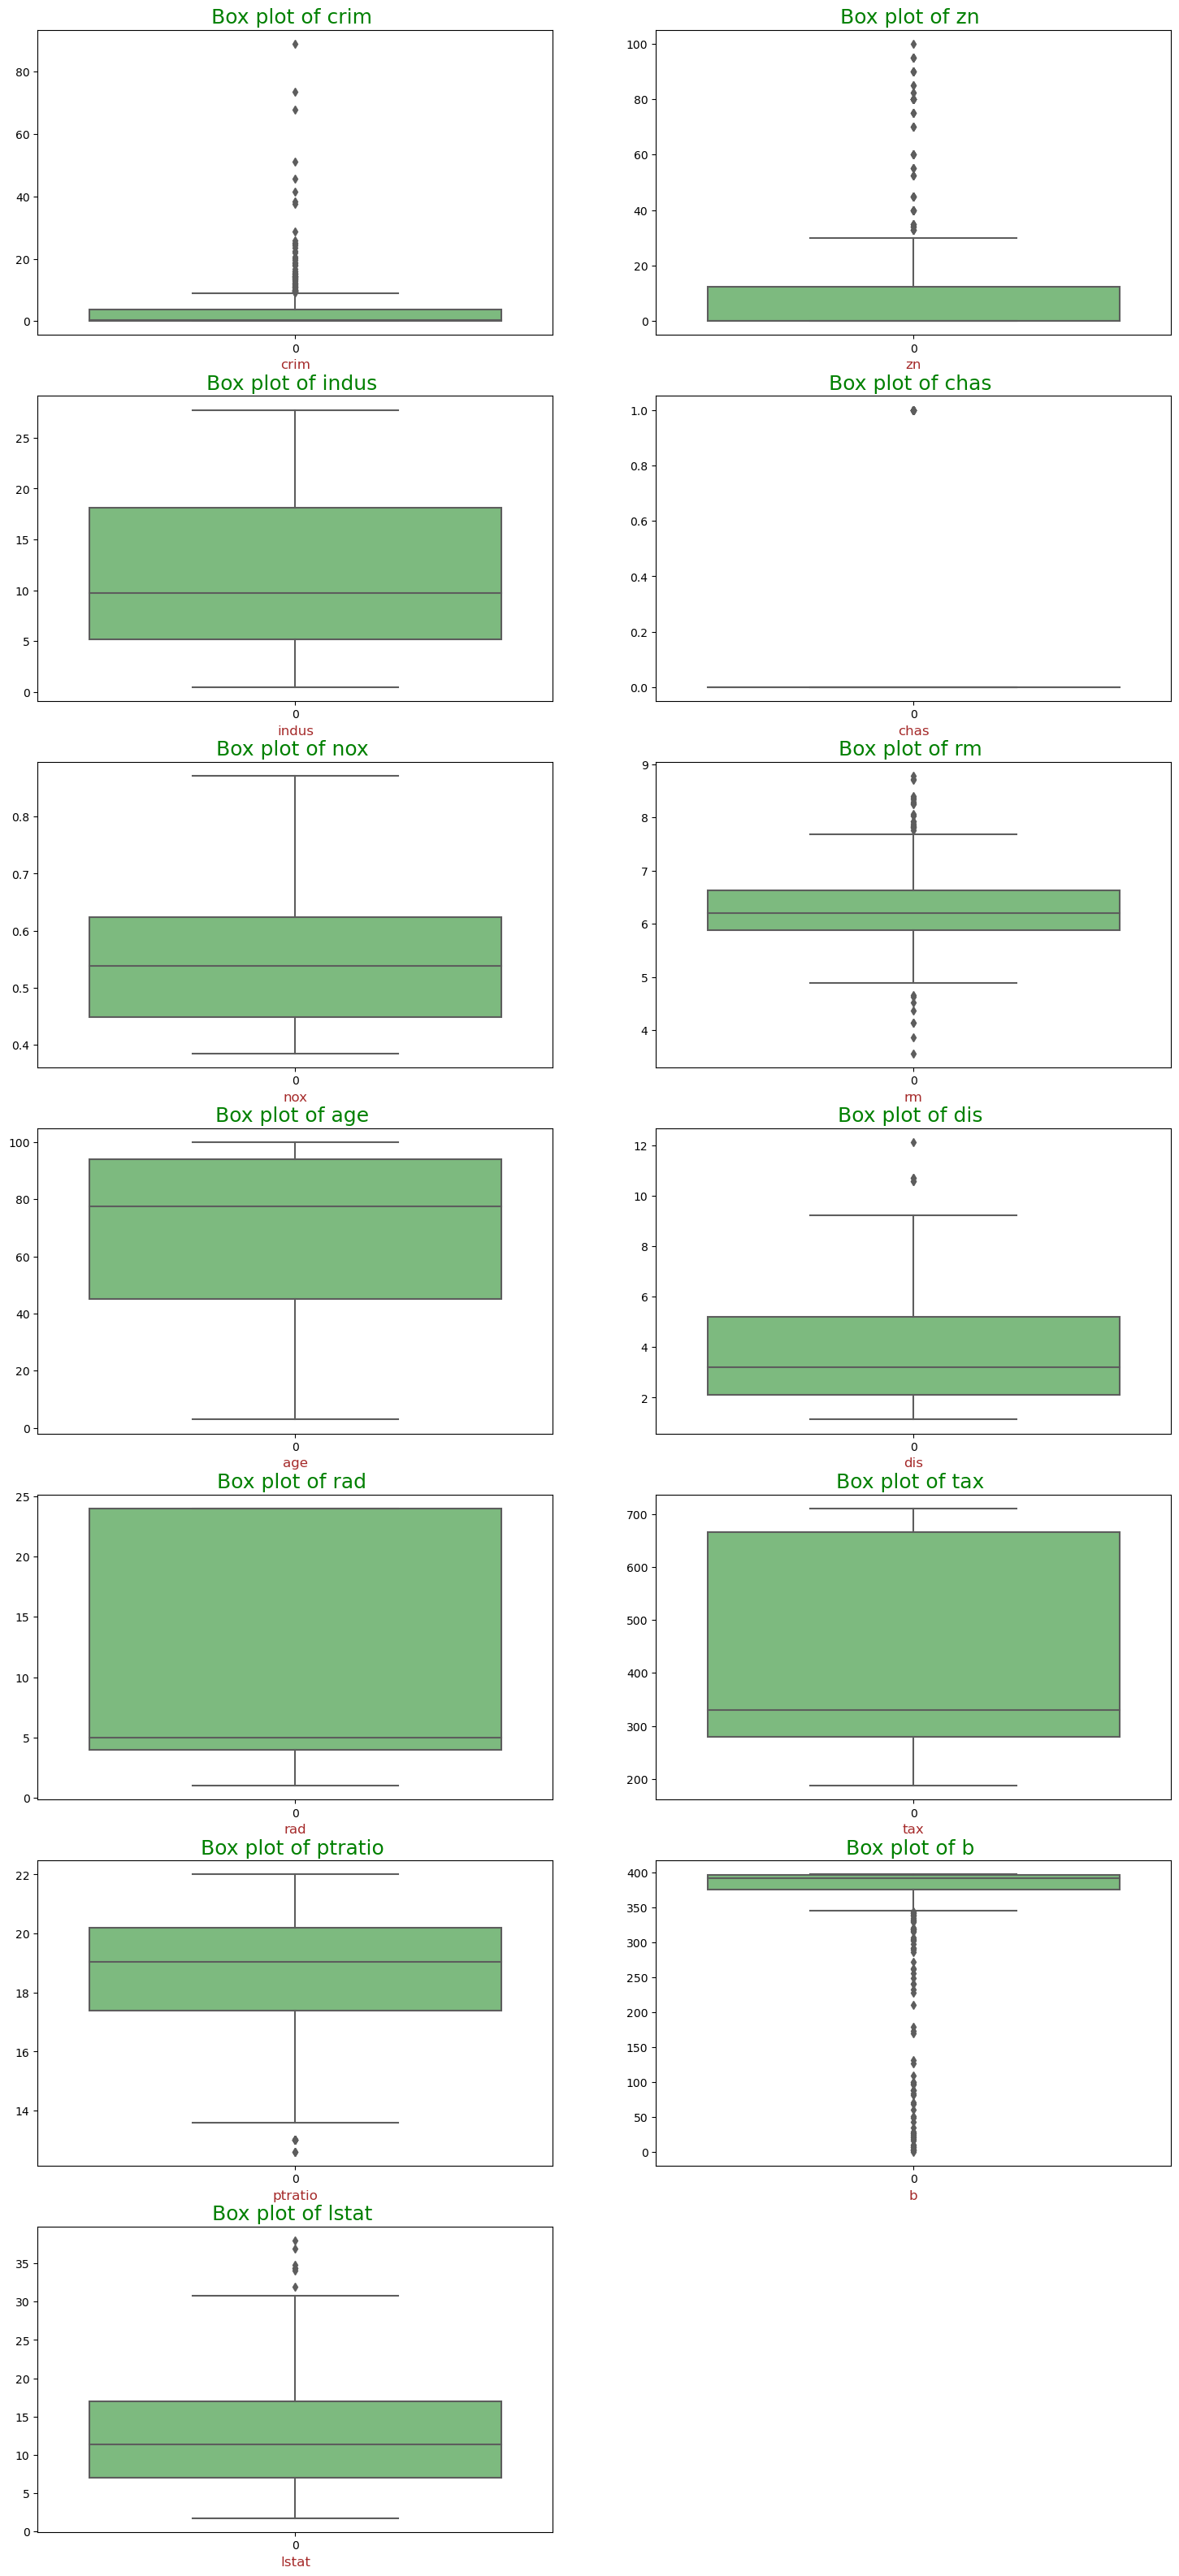

In [14]:
plt.figure(figsize=[18, 40])
for i, col in enumerate(cols, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot of {col} '
    x_label= f'{col}'
    fig=sns.boxplot(data= housing[col], palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

## 2.4 Split the training and testing set

In [15]:
y= housing['medv_log_trans']
X= housing.drop('medv_log_trans',axis=1)
X= X.drop('medv',axis=1)
#X.head()

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [16]:
X_train.shape

(354, 13)

In [17]:
X_test.shape

(152, 13)

In [18]:
y_train.shape

(354,)

In [19]:
y_test.shape

(152,)

In [20]:
# Getting index values of train test dataset
train_index= X_train.index
test_index= X_test.index

## 2.5 Rescale the variables due to the existences of outliers

In [21]:
num_cols= housing.columns.tolist()
num_cols.remove('medv_log_trans')
num_cols.remove('medv')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [22]:
X_train[num_cols].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
5,-0.009315,0.0,-0.314168,0.0,-0.169873,0.060810,-0.206777,0.390520,-0.086957,-0.228330,0.012195,0.006725,-0.207001
116,-0.005134,0.0,0.013387,0.0,0.019111,-0.015465,-0.053773,-0.049851,0.043478,0.215645,-0.097561,0.004537,0.040386
45,-0.003497,0.0,-0.116297,0.0,-0.191107,-0.163811,-0.482848,0.263408,-0.086957,-0.205074,-0.085366,0.014143,-0.025898
16,0.032773,0.0,-0.064842,0.0,0.000000,-0.087836,-0.532741,0.183874,-0.043478,-0.048626,0.292683,-0.012676,-0.157378
468,0.629592,0.0,0.351818,0.0,0.089183,-0.090539,-0.070404,-0.026287,0.826087,0.710359,0.195122,-0.061004,0.260969


In [23]:
y_train

5      3.356897
116    3.054001
45     2.960105
16     3.139833
468    2.949688
         ...   
106    2.970414
270    3.049273
348    3.198673
435    2.595255
102    2.923162
Name: medv_log_trans, Length: 354, dtype: float64

In [24]:
y_train.sort_values()

405    1.609438
400    1.722767
399    1.840550
385    1.974081
415    1.974081
         ...   
257    3.912023
370    3.912023
368    3.912023
166    3.912023
283    3.912023
Name: medv_log_trans, Length: 354, dtype: float64

# 3.Build the Lasso regression model

## 3.1 Find the optimal lamda

### 3.1.1 Get lamda's rough location in [0,1]

In [25]:
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # an array of lamda candidates
params_grid= {'alpha': range1} #searching over different values of ‘alpha’ 
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)  #perform the grid search and find the best hyperparameters for the Lasso model on training set.       

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [26]:
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [27]:
lasso_gcv.best_score_

-0.14309131833377245

In [28]:
actual_MAE=-lasso_gcv.best_score_
actual_MAE

0.14309131833377245

### 3.1.2 Find the optimal lamda around 0.001

In [29]:
range2= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001,0.002,0.003,0.004]
params_grid= {'alpha': range2}
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)     

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003,
                                   0.004]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [30]:
lasso_gcv.best_score_

-0.14309131833377245

In [31]:
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

## 3.2 Fit the Lasso model using lamda=0.001

In [32]:
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [33]:
lasso_model.intercept_

3.1392596093010225

In [34]:
lasso_model.coef_

array([-0.23901105,  0.02315828,  0.        ,  0.10211599, -0.21169403,
        0.32481098, -0.00097234, -0.25295107,  0.11991946, -0.08971806,
       -0.27052598,  0.19715086, -0.83781336])

## 3.3 Evaluate the model using the testing set and MSE 

### 3.3.1 On training set

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [36]:
y_train_pred= lasso_model.predict(X_train)
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print('adj. r2 on training dataset:', 1 - (1 - r2_score(y_train, y_train_pred) ) * (354 - 1) / (354 - 12 - 1))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

MSE on training dataset: 0.03588449097029216
r2 score on training dataset: 0.7900996167605849
adj. r2 on training dataset: 0.7827130930102243
RMSE on training dataset: 0.1894320220297829
MAE on training dataset: 0.1357048219175345


### 3.3.2 On testing set

In [37]:
y_test_pred= lasso_model.predict(X_test)
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))

MSE on testing dataset: 0.03838649167639508


In [38]:
# R^2 and adj. R^2

print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print('adj. r2 on testing dataset:',1 - (1 - r2_score(y_test, y_test_pred) ) * (152 - 1) / (152 - 12 - 1))

r2 score on testing dataset: 0.7505718946623197
adj. r2 on testing dataset: 0.7290385330504336


In [39]:

print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

RMSE on testing dataset: 0.19592470920329338
MAE on testing dataset: 0.1362031809513098


### 3.3.3 Plot the fitted values and the actual values of the training and testing set

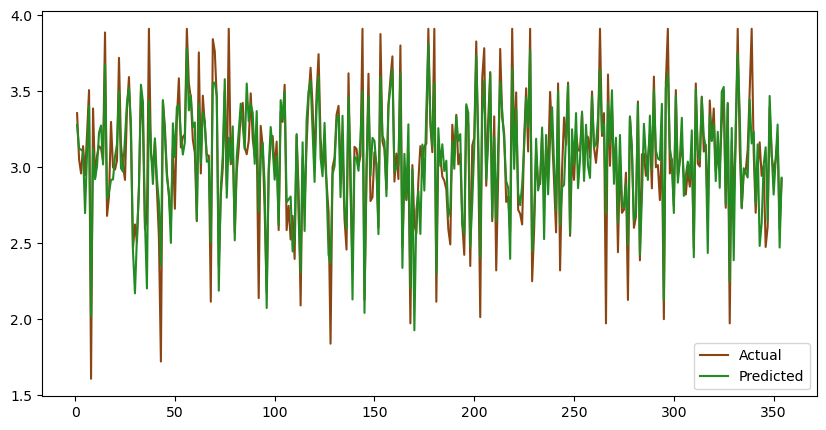

In [40]:
plt.figure(figsize=(10,5))
x=np.arange(1,355)
plt.plot(x,y_train,label='Actual',color='saddlebrown')
plt.plot(x,y_train_pred,label='Predicted',color='forestgreen')
plt.legend()
plt.show()

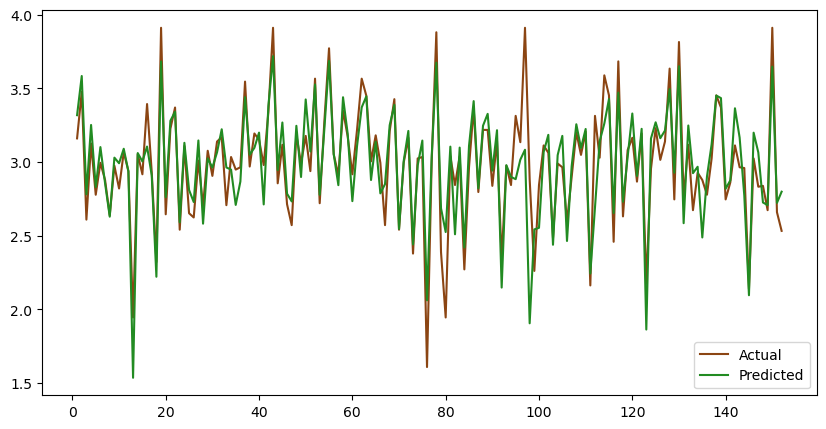

In [41]:
plt.figure(figsize=(10,5))
x=np.arange(1,153)
plt.plot(x,y_test,label='Actual',color='saddlebrown')
plt.plot(x,y_test_pred,label='Predicted',color='forestgreen')
plt.legend()
plt.show()

## 3.4 Features selected by Lasso regression

In [42]:
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)

Features selected by Lasso: 12


In [43]:
lasso_coef[lasso_coef != 0]

crim      -0.239011
zn         0.023158
chas       0.102116
nox       -0.211694
rm         0.324811
age       -0.000972
dis       -0.252951
rad        0.119919
tax       -0.089718
ptratio   -0.270526
b          0.197151
lstat     -0.837813
dtype: float64

In [44]:
top5_features_l=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(5).index]
top5_features_l

lstat     -0.837813
rm         0.324811
ptratio   -0.270526
dis       -0.252951
crim      -0.239011
dtype: float64

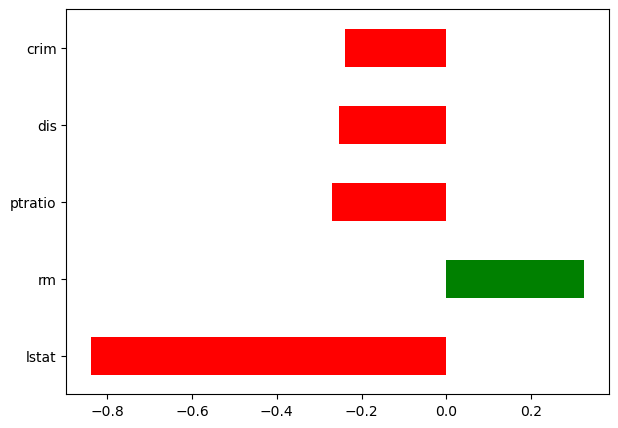

In [45]:
# Top 5
plt.figure(figsize= (7, 5))
top5_features_l.plot.barh(color= (top5_features_l > 0).map({True: 'g', False: 'r'}))
plt.show()

In [46]:
top10_features_l=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(10).index]
top10_features_l

lstat     -0.837813
rm         0.324811
ptratio   -0.270526
dis       -0.252951
crim      -0.239011
nox       -0.211694
b          0.197151
rad        0.119919
chas       0.102116
tax       -0.089718
dtype: float64

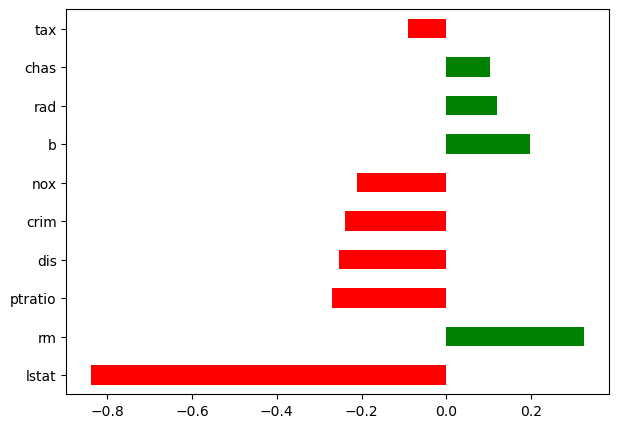

In [93]:
# Top 10
plt.figure(figsize= (7, 5))
top10_features_l.plot.barh(color= (top10_features_l > 0).map({True: 'g', False: 'r'}))
plt.show()

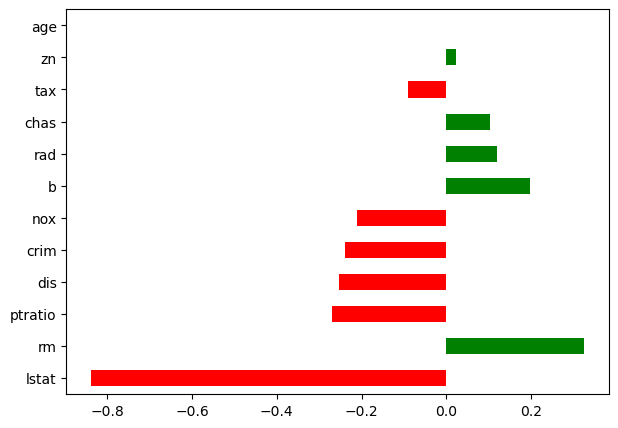

In [48]:
# All 12 selected features
all_features_l=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(12).index]

plt.figure(figsize= (7, 5))
all_features_l.plot.barh(color= (all_features_l > 0).map({True: 'g', False: 'r'}))
plt.show()

# 4. Result

# 5. Further Discussion

## 5.1 What if we use Other Models? Is Lasso truly the most suitable one?

### 5.1.1 Using Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f'Mean Squared Error: {mse_linear}')


Mean Squared Error: 0.036863271644368624


In [51]:
print( 'r2 score on testing dataset:', r2_score(y_test, y_pred_linear))

r2 score on testing dataset: 0.7604694880606345


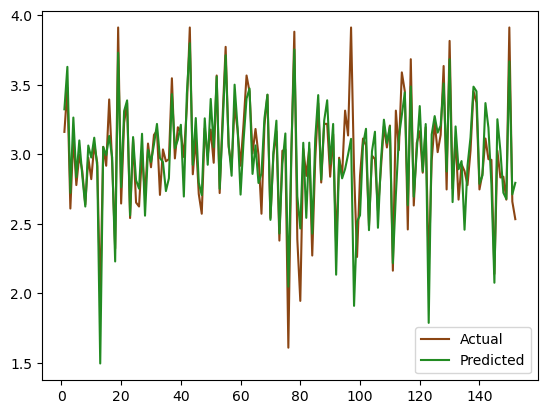

In [52]:
plt.figure()
x=np.arange(1,153)
plt.plot(x,y_test,label='Actual',color='saddlebrown')
plt.plot(x,y_pred_linear,label='Predicted',color='forestgreen')
plt.legend()
plt.show()

### 5.1.2 Using Polynomial Regression with degree 2

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred_poly = model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)

print(f'Mean Squared Error: {mse_poly}')
print( 'r2 score on testing dataset:', r2_score(y_test, y_pred_poly))

Mean Squared Error: 0.031193045603443305
r2 score on testing dataset: 0.7973135359654885


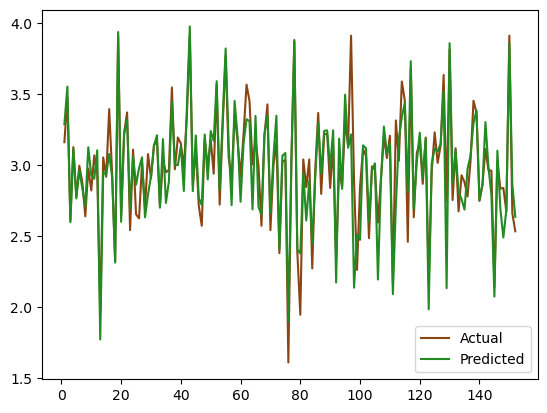

In [55]:
plt.figure()
x=np.arange(1,153)
plt.plot(x,y_test,label='Actual',color='saddlebrown')
plt.plot(x,y_pred_poly,label='Predicted',color='forestgreen')
plt.legend()
plt.show()

### 5.1.3 Using Ridge Regression

In [56]:
from sklearn.linear_model import Ridge

In [57]:
range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range3= list(range(2, 1001))
range1.extend(range3)
params_grid= {'alpha': range1}

In [58]:
ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)      
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
gcv_ridge.best_params_

{'alpha': 1.0}

In [60]:
gcv_ridge.best_estimator_

Ridge(random_state=42)

In [61]:
gcv_ridge.best_score_

-0.14195681314045352

In [62]:
ridge_model= gcv_ridge.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(random_state=42)

In [63]:
len(ridge_model.coef_)

13

In [64]:
y_test_pred_r= ridge_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred_r))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred_r))

r2 score on testing dataset: 0.7582372872815837
MSE on testing dataset: 0.03720680292569345


In [65]:
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred_r)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred_r))
print('adj. r2 on testing dataset:', 1 - (1 - r2_score(y_test, y_test_pred_r) ) * (152 - 1) / (152 - 13 - 1))

RMSE on testing dataset: 0.19289065017696802
MAE on testing dataset: 0.13288311849282197
adj. r2 on testing dataset: 0.7354625389820227


In [66]:
ridge_coef= pd.Series(ridge_model.coef_, index= X_train.columns)
top_5_ridge=  ridge_coef[abs(ridge_coef).nlargest(5).index]
top_5_ridge

lstat     -0.776522
rm         0.345904
dis       -0.294497
ptratio   -0.275090
crim      -0.251523
dtype: float64

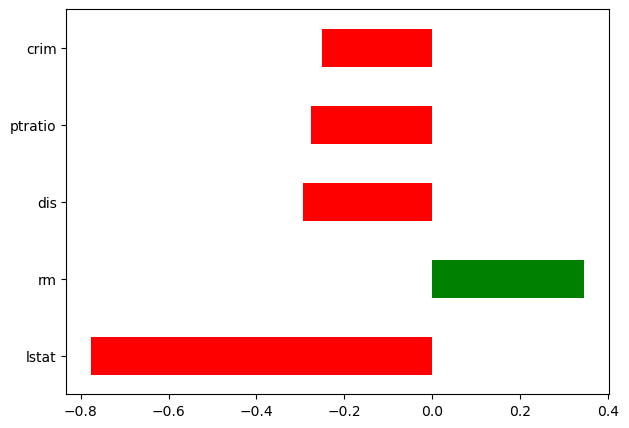

In [67]:
# Top 5
plt.figure(figsize= (7, 5))
top_5_ridge.plot.barh(color= (top_5_ridge > 0).map({True: 'g', False: 'r'}))
plt.show()

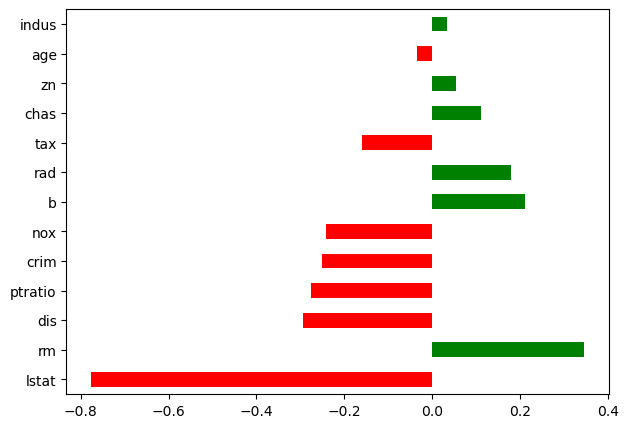

In [68]:
# All 13 features
ridge_coef= pd.Series(ridge_model.coef_, index= X_train.columns)
all_ridge=  ridge_coef[abs(ridge_coef).nlargest(13).index]
plt.figure(figsize= (7, 5))
all_ridge.plot.barh(color= (all_ridge >= 0).map({True: 'g', False: 'r'}))
plt.show()

## 5.2 Can we improve the Lasso model?

In [69]:
housing['medv'].sort_values()

398     5.0
405     5.0
400     5.6
399     6.3
414     7.0
       ... 
166    50.0
195    50.0
283    50.0
225    50.0
186    50.0
Name: medv, Length: 506, dtype: float64

In [70]:
all_features=housing.drop(['medv_log_trans'],axis=1)

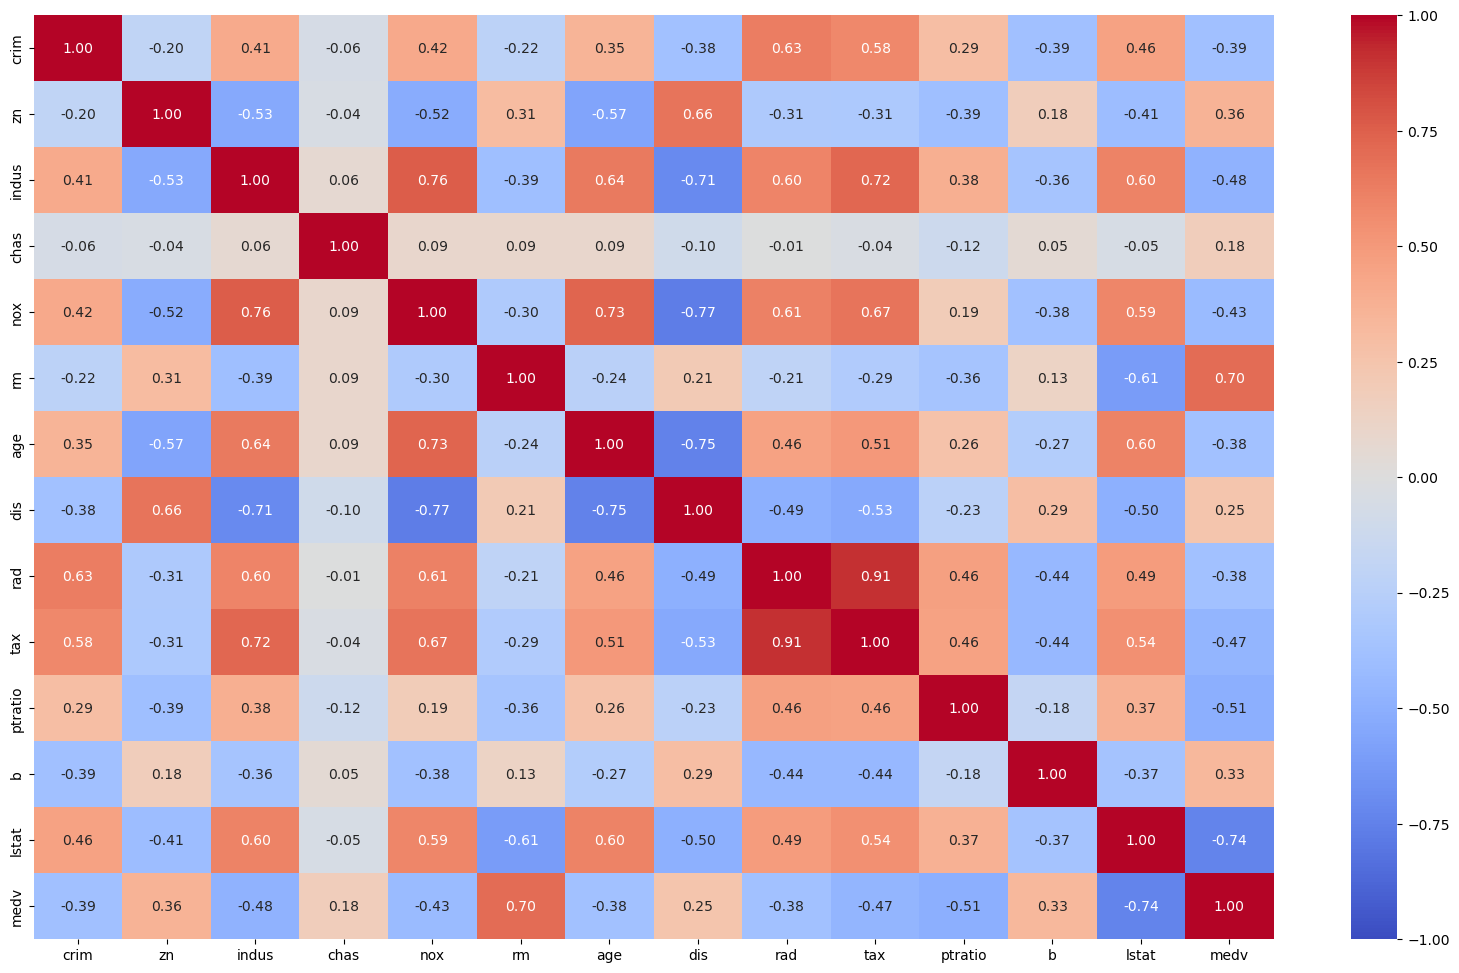

In [71]:
plt.figure(figsize = (20, 12))
sns.heatmap(all_features.corr(), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1)
plt.show()

In [72]:
improved = housing.drop(["crim", "zn", "rad", "b","dis","age","chas",'medv_log_trans'], axis=1)
improved.head()

,indus,nox,rm,tax,ptratio,lstat,medv
0,2.31,0.538,6.575,296,15.3,4.98,24.0
1,7.07,0.469,6.421,242,17.8,9.14,21.6
2,7.07,0.469,7.185,242,17.8,4.03,34.7
3,2.18,0.458,6.998,222,18.7,2.94,33.4
4,2.18,0.458,7.147,222,18.7,5.33,36.2


In [73]:
skewness = improved.apply(stats.skew)
skewness

indus      0.294146
nox        0.727144
rm         0.402415
tax        0.667968
ptratio   -0.799945
lstat      0.903771
medv       1.104811
dtype: float64

In [74]:
improved['nox_log_trans']= np.log(improved['nox'])
improved['tax_log_trans']= np.log(improved['tax'])
improved['lstat_log_trans']= np.log(improved['lstat'])
improved['medv_log_trans']= np.log(improved['medv'])

improved=improved.drop(['nox','tax','lstat','medv'],axis=1)

In [75]:
ptratio_boxcox, lam = stats.boxcox(improved['ptratio'])
print("Optimal λ: ", lam)

Optimal λ:  4.350215431329132


In [76]:
improved['ptratio']=ptratio_boxcox
improved

,indus,rm,ptratio,nox_log_trans,tax_log_trans,lstat_log_trans,medv_log_trans
0,2.31,6.575,32745.311816,-0.619897,5.690359,1.605430,3.178054
1,7.07,6.421,63253.425063,-0.757153,5.488938,2.212660,3.072693
2,7.07,7.185,63253.425063,-0.757153,5.488938,1.393766,3.546740
3,2.18,6.998,78392.216639,-0.780886,5.402677,1.078410,3.508556
4,2.18,7.147,78392.216639,-0.780886,5.402677,1.673351,3.589059
...,...,...,...,...,...,...,...
501,11.93,6.593,129845.602554,-0.556870,5.609472,2.269028,3.109061
502,11.93,6.120,129845.602554,-0.556870,5.609472,2.206074,3.025291
503,11.93,6.976,129845.602554,-0.556870,5.609472,1.729884,3.173878
504,11.93,6.794,129845.602554,-0.556870,5.609472,1.868721,3.091042


In [77]:
skewness = improved.apply(stats.skew)
skewness

indus              0.294146
rm                 0.402415
ptratio           -0.222262
nox_log_trans      0.356718
tax_log_trans      0.329576
lstat_log_trans   -0.319282
medv_log_trans    -0.329341
dtype: float64

In [78]:
# According to the article, let 80% be the training set, and 20% be the testing set

y_improved= improved['medv_log_trans']
X_improved= improved.drop('medv_log_trans',axis=1)

X_train_improved, X_test_improved, y_train_improved, y_test_improved= train_test_split(X_improved, y_improved, train_size= .8, random_state= 42)

In [79]:
X_train_improved.shape

(404, 6)

In [80]:
X_test_improved.shape

(102, 6)

In [81]:
# Standarlize all the features by Robust Scalling

num_cols= improved.columns.tolist()
num_cols.remove('medv_log_trans')

scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train_improved[num_cols])
X_train_improved[num_cols]= scaler.transform(X_train_improved[num_cols])
X_test_improved[num_cols]= scaler.transform(X_test_improved[num_cols])

In [82]:
X_train_improved.head()

,indus,rm,ptratio,nox_log_trans,tax_log_trans,lstat_log_trans
477,0.399090,-0.274974,0.262332,0.169802,0.566928,0.358949
15,-0.017570,-0.114117,0.431688,0.000000,-0.058328,-0.110841
332,-0.104583,-0.054327,-0.234239,-0.264551,-0.066256,-0.145057
423,0.399090,-0.032475,0.262332,0.169802,0.566928,0.329664
19,-0.017570,-0.146592,0.431688,0.000000,-0.058328,0.013930


In [83]:
params_grid= {'alpha': range1}  
lasso= Lasso(random_state= 42)
lasso_gcv_improved= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv_improved.fit(X_train_improved, y_train_improved) 

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
lasso_gcv_improved.best_estimator_

Lasso(alpha=0.0001, random_state=42)

In [85]:
lasso_gcv_improved.best_score_

-0.15913378039602225

In [86]:
params_grid= {'alpha': range2}
lasso_gcv_improved= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv_improved.fit(X_train_improved, y_train_improved) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001, 0.002, 0.003,
                                   0.004]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
lasso_gcv_improved.best_estimator_

Lasso(alpha=5e-05, random_state=42)

In [88]:
lasso_model_improved= lasso_gcv_improved.best_estimator_
lasso_model_improved.fit(X_train_improved, y_train_improved)

Lasso(alpha=5e-05, random_state=42)

In [89]:
lasso_coef_improved= pd.Series(lasso_model_improved.coef_, index= X_train_improved.columns)
selected_features_improved= len(lasso_coef_improved[lasso_coef_improved != 0])
print('Features selected by Lasso:', selected_features_improved)

Features selected by Lasso: 6


In [90]:
lasso_coef_improved[lasso_coef_improved != 0]

indus              0.089259
rm                 0.319829
ptratio           -0.194658
nox_log_trans      0.021623
tax_log_trans     -0.252340
lstat_log_trans   -0.938904
dtype: float64

In [91]:
y_test_pred_improved= lasso_model_improved.predict(X_test_improved)
print( 'MSE on testing dataset:', mean_squared_error(y_test_improved, y_test_pred_improved))

MSE on testing dataset: 0.0462042994006185


In [92]:
print( 'r2 score on testing dataset:', r2_score(y_test_improved, y_test_pred_improved))

r2 score on testing dataset: 0.7035978772816043
